In [14]:
# Подгружаем датасет ирисов, метим выход (вид ириса)
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = datasets.load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Accuracy (KNN): 100.00%


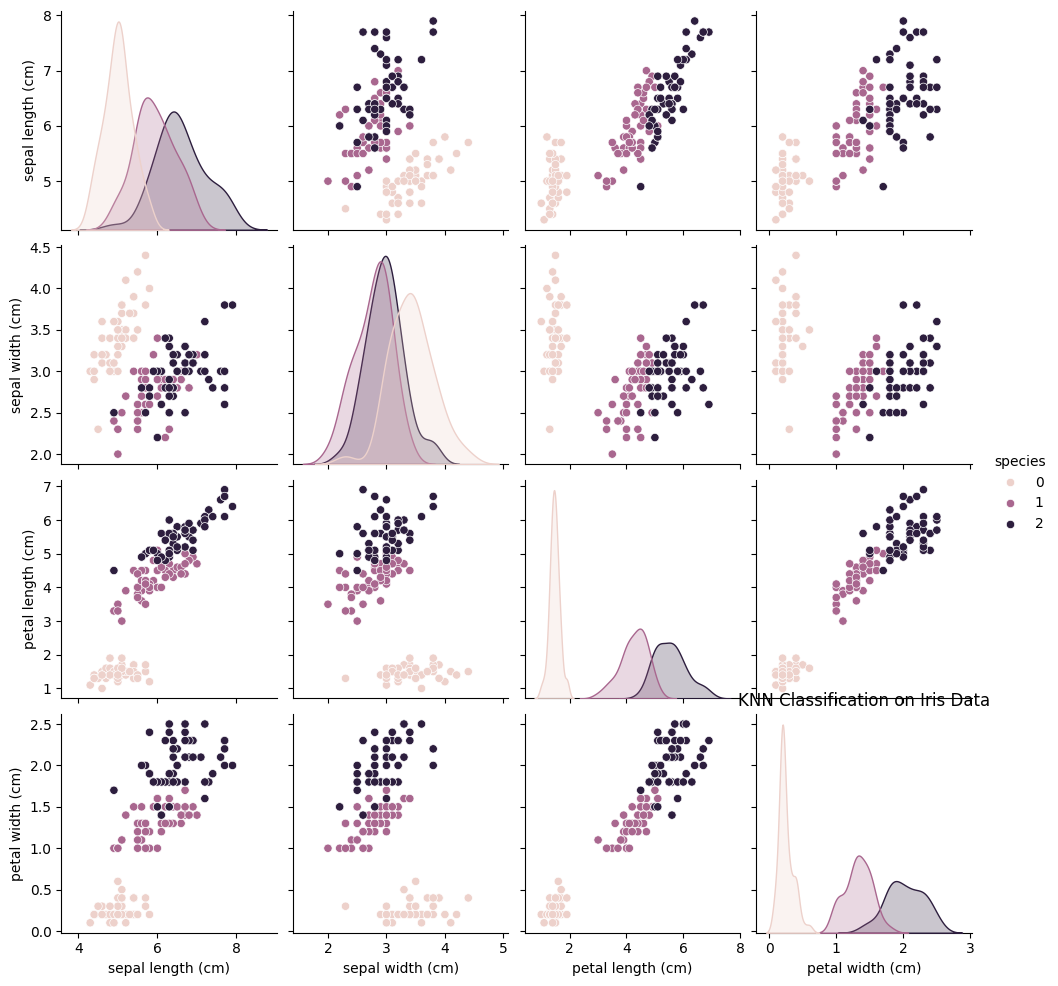

In [15]:
# Классификация с помощью K-ближайших соседей (KNN)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X = iris_df.drop(columns='species')
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy (KNN): {accuracy_knn * 100:.2f}%')

sns.pairplot(iris_df, hue='species')
plt.title('K-ближайших соседей')
plt.show()

Accuracy (Random Forest): 100.00%


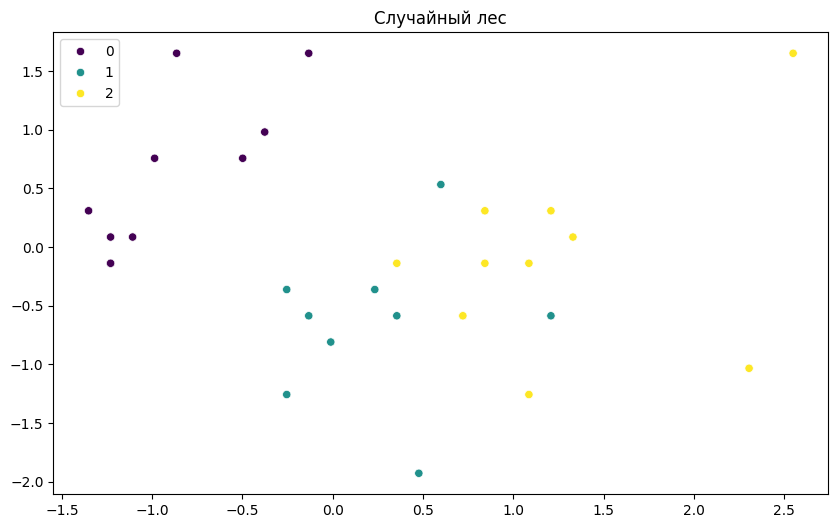

In [17]:
# Классификация с помощью случайного леса (Random Forest)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy (Random Forest): {accuracy_rf * 100:.2f}%')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred_rf, palette='viridis')
plt.title('Случайный лес')
plt.show()


Accuracy (SVM): 96.67%


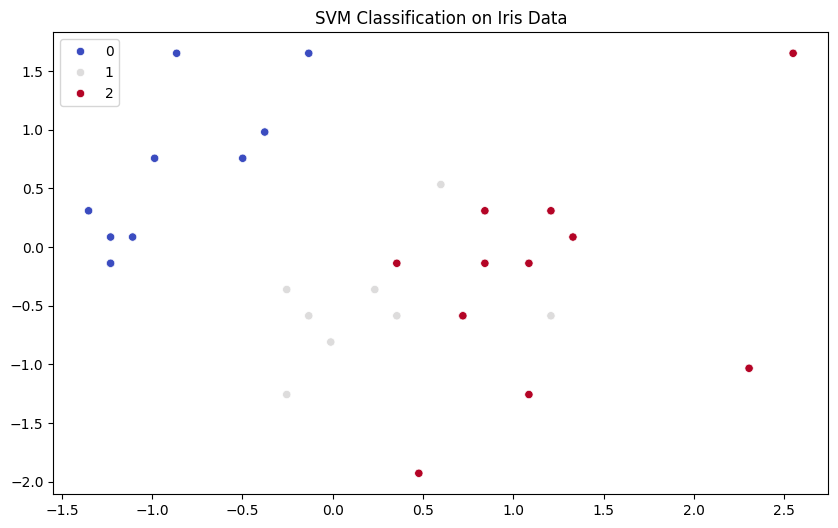

In [19]:
# Классификация с помощью машин опорных векторов (SVM)
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy (SVM): {accuracy_svm * 100:.2f}%')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred_svm, palette='coolwarm')
plt.title('SVM')
plt.show()


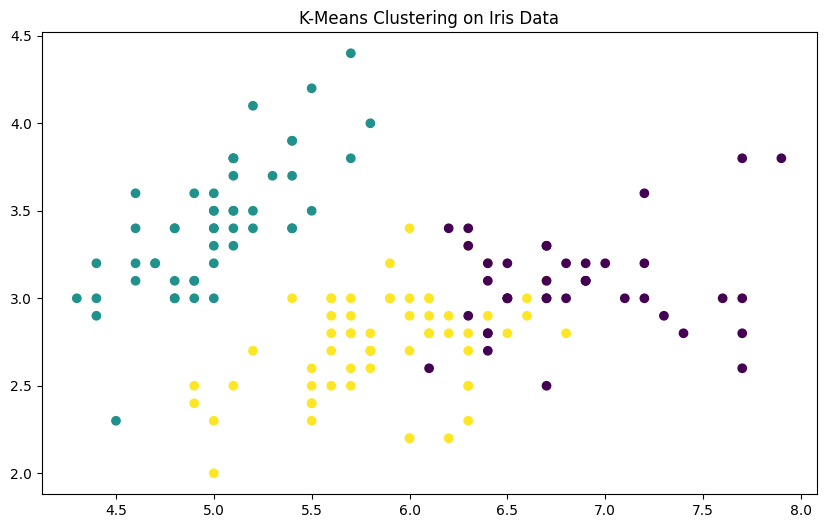

In [20]:
# Кластеризация с помощью K-средних (K-Means)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-Means')
plt.show()


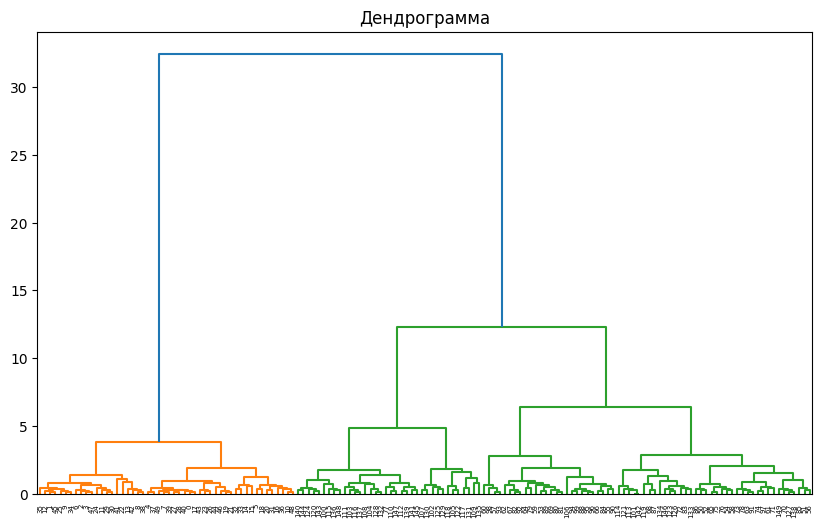

In [22]:
# Иерархическая кластеризация методом Уорда
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Дендрограмма')
plt.show()


c:\Users\ziyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


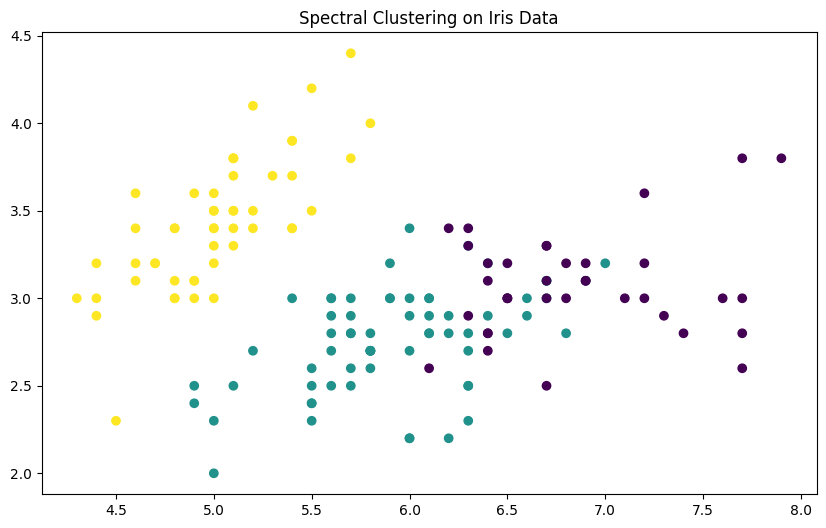

In [23]:
# Спектральная кластеризация
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
y_spectral = spectral.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_spectral, cmap='viridis')
plt.title('Спектральная кластеризация')
plt.show()


Accuracy (Логистическая регрессия): 97.84%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4884
           1       0.94      0.81      0.87       486

    accuracy                           0.98      5370
   macro avg       0.96      0.90      0.93      5370
weighted avg       0.98      0.98      0.98      5370



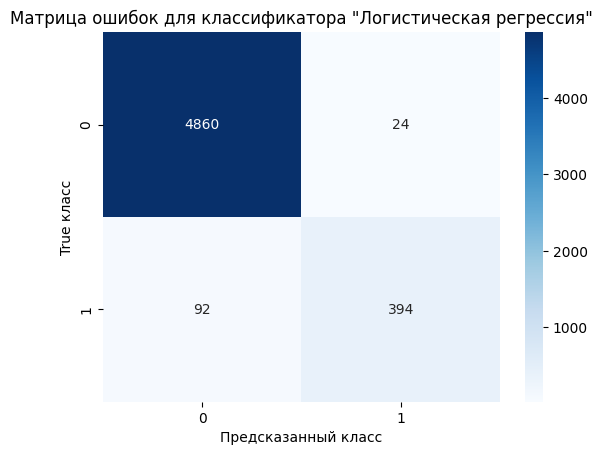

Accuracy (K-ближайших соседей): 97.82%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4884
           1       0.93      0.83      0.87       486

    accuracy                           0.98      5370
   macro avg       0.95      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



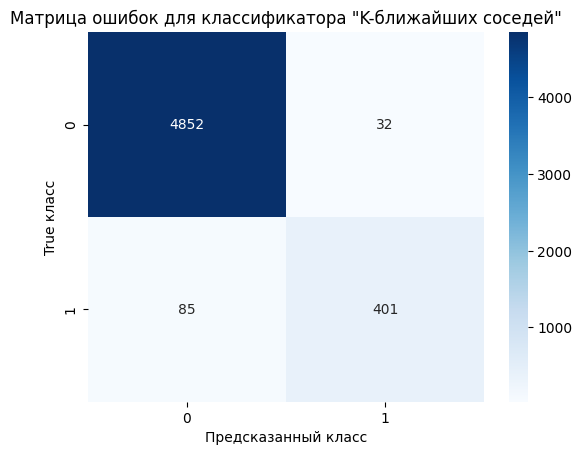

Accuracy (Случайный лес): 98.01%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4884
           1       0.94      0.84      0.88       486

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.94      5370
weighted avg       0.98      0.98      0.98      5370



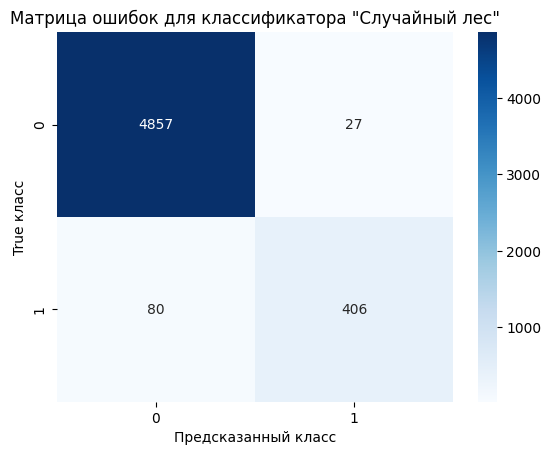

In [30]:
# HTRU2
columns_htru = ['Mean_IP', 'SD_IP', 'Kurt_IP', 'Skew_IP', 'Mean_DM', 'SD_DM', 'Kurt_DM', 'Skew_DM', 'Class']

htru_df = pd.read_csv('htru2/HTRU_2.csv', header=None, names=columns_htru)

# Разделяем данные на признаки и целевую переменную
X_htru = htru_df.drop(columns='Class')
y_htru = htru_df['Class']

# Делим на обучающую и тестовую выборки
X_train_htru, X_test_htru, y_train_htru, y_test_htru = train_test_split(X_htru, y_htru, test_size=0.3, random_state=42)

scaler_htru = StandardScaler()
X_train_htru = scaler_htru.fit_transform(X_train_htru)
X_test_htru = scaler_htru.transform(X_test_htru)

# Общая функция для обучения и оценки точности (для разных классификаторов)
def evaluate_model(model, model_name):
    model.fit(X_train_htru, y_train_htru)
    
    y_pred = model.predict(X_test_htru)
    
    accuracy = accuracy_score(y_test_htru, y_pred)
    print(f'Accuracy ({model_name}): {accuracy * 100:.2f}%')
    
    # Отчёт
    print(classification_report(y_test_htru, y_pred))
    
    # Матрица ошибок
    conf_matrix = confusion_matrix(y_test_htru, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Матрица ошибок для классификатора "{model_name}"')
    plt.xlabel('Предсказанный класс')
    plt.ylabel('True класс')
    plt.show()

# Логистическая регрессия
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
evaluate_model(logreg, 'Логистическая регрессия')

# K-ближайших соседей (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, 'K-ближайших соседей')

# Случайный лес
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf, 'Случайный лес')


Для задач, связанных с поиском редких объектов, таких как пульсары, одна только точность (98%) не является достаточной метрикой для оценки модели. Необходимо учитывать recall и precision.
* Если цель — как можно точнее распознать пульсары для дальнейшего анализа, важен recall, так как пропуск пульсара может означать упущение важного научного открытия.
* Если критично избегать ложных срабатываний, важен precision, чтобы не тратить ресурсы на исследование ложных сигналов.

Если у модели высокие значения precision и recall (≥95%), тогда точность в 98% это норм, но если одна из этих метрик низкая, то требуется улучшение модели.
По результатам видно, что все модели имеют плюс минус схожую точность. 